In [4]:
import pandas as pd

# Define the column names as per the data dictionary
column_names = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
                'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
                'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
                'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
                'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
                'UsingPopupWindow', 'IframeRedirection', 'AgeOfDomain',
                'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
                'LinksPointingToPage', 'StatsReport', 'class']

# Load the data
data = pd.read_csv('/kaggle/input/phishing/phishing.txt', header=None, names=column_names)


In [5]:
# Check the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Statistical summary
print(data.describe())


   UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0       -1        1         1        1             -1             -1   
1        1        1         1        1              1             -1   
2        1        0         1        1              1             -1   
3        1        0         1        1              1             -1   
4        1        0        -1        1              1             -1   

   SubDomains  HTTPS  DomainRegLen  Favicon  ...  UsingPopupWindow  \
0          -1     -1            -1        1  ...                 1   
1           0      1            -1        1  ...                 1   
2          -1     -1            -1        1  ...                 1   
3          -1     -1             1        1  ...                 1   
4           1      1            -1        1  ...                -1   

   IframeRedirection  AgeOfDomain  DNSRecording  WebsiteTraffic  PageRank  \
0                  1           -1            -1              -1      

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target
X = data.drop('class', axis=1)
y = data['class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Logistic Regression model with C=100 as suggested
model = LogisticRegression(C=100, max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 92.19%
[[1298  130]
 [ 129 1760]]


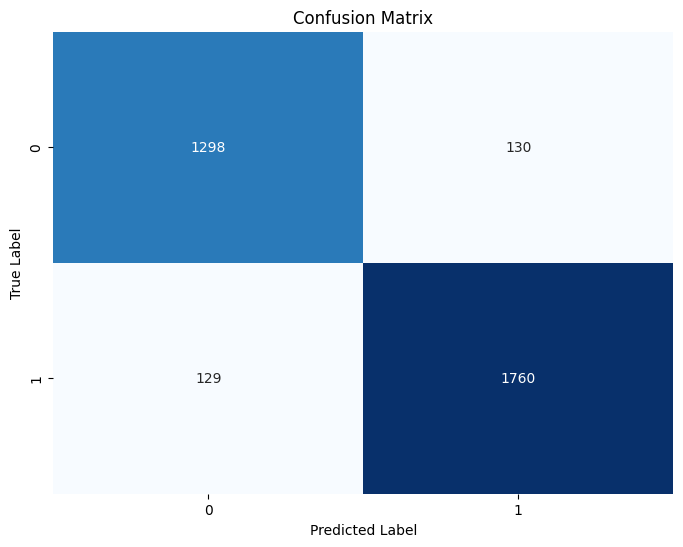

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


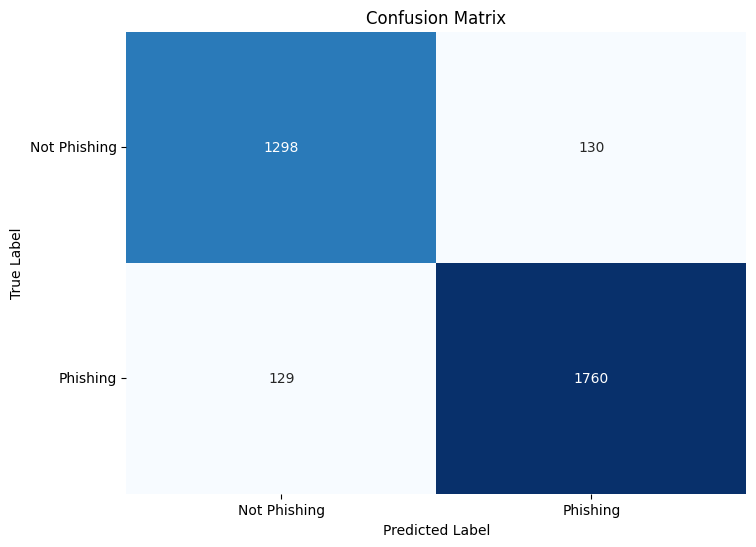

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Setting axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Setting tick labels for classes
class_labels = ['Not Phishing', 'Phishing']
plt.xticks(ticks=[0.5, 1.5], labels=class_labels)  # Adjust tick positions and labels
plt.yticks(ticks=[0.5, 1.5], labels=class_labels, rotation=0)  # Adjust tick positions and labels

plt.show()
